# Image Preprocessing and Binary Classification with Keras

## Objective
In this week's exercise, you will:
1. Learn how to image preprocessing in keras.
2. Build and train a multilayer neural network for binary classification on a real-world dataset of cats and dogs.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#%pip install tensorflow-datasets
import tensorflow_datasets as tfds



2024-11-21 13:33:20.196096: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-21 13:33:20.217210: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 13:33:20.421337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 13:33:20.523830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732196000.776119   29169 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732196000.86

---

## Step 2: Load and Preprocess the Data
We will use the Keras `ImageDataGenerator` for image augmentation and preprocessing.
First, unzip the uploaded dataset.


In [2]:
# download the cats_vs_dogs dataset from tensorflow_datasets 

dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

# print the number of classes in the dataset
print(info.features['label'].num_classes)

# print the number of total images and number of cats images and dogs images 
print(info.features['label'].names)
print(info.splits['train'].num_examples)

# Count the number of cat and dog images
cat_count = 0
dog_count = 0
for image, label in tfds.as_numpy(dataset['train']):
	if label == 0:
		cat_count += 1
	else:
		dog_count += 1

print(f'Number of cat images: {cat_count}')
print(f'Number of dog images: {dog_count}')





2024-11-21 13:33:26.060102: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2024-11-21 13:33:26.177234: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


2
['cat', 'dog']
23262
Number of cat images: 11658
Number of dog images: 11604


2024-11-21 13:33:45.970935: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Step 3: Learn about undersampling and implement it
Research online what undersampling and random undersampling is. It is a very powerful technique used often in machine Learning. Find out when it is used and undersample your dataset using "random undersampling"

In [3]:
# undersample your dataset
# apparently the dataset is already balanced - no need for undersampling

---

## Step 4: Set Up ImageDataGenerator (or well more specifically the new version)
Were Sorry - the videos from the coursera course are sometimes not the most up to date. In this case the 'ImageDataGenerator' function is deprecated (look here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and will be removed in the future versions. The concept behind the new reccomended function is very similar though.
The new reccomendation is loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers.

You may use Chat GPT for this task and you can also check the following tutorials <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/guide/keras/preprocessing_layers <br>

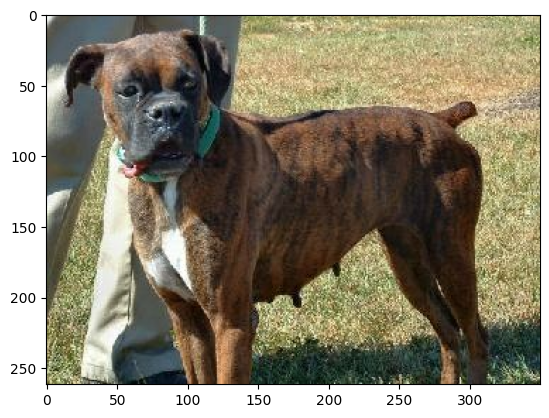

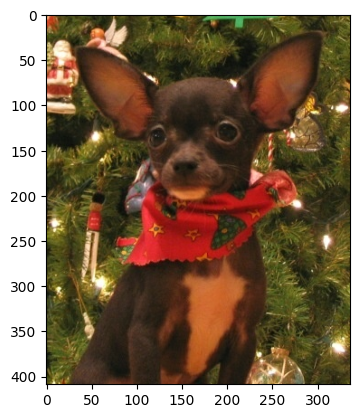

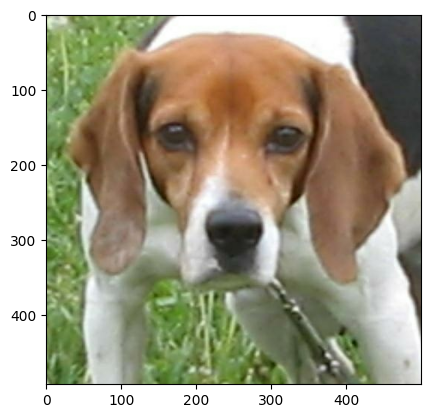

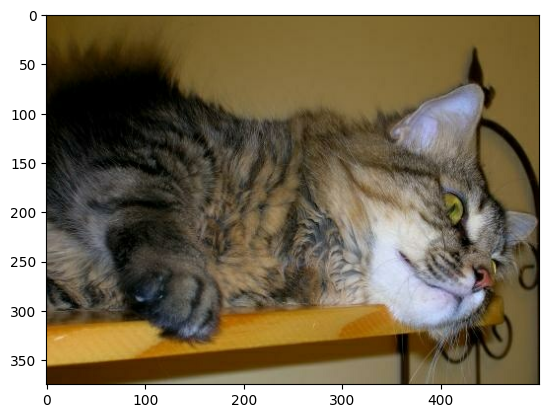

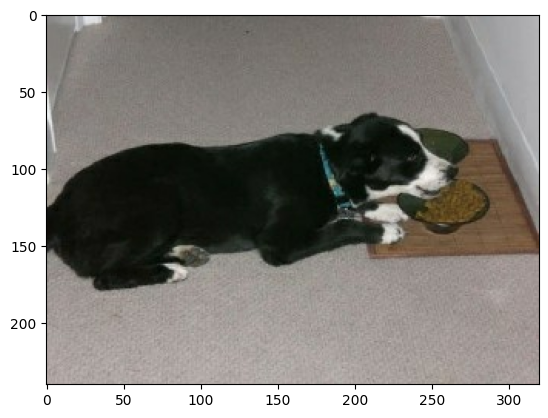

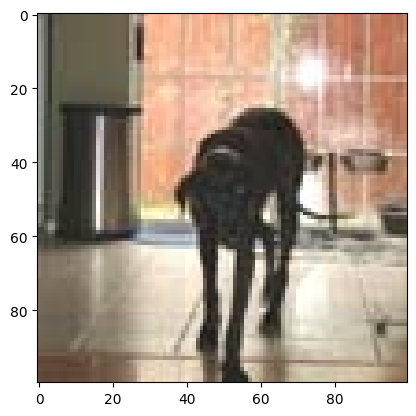

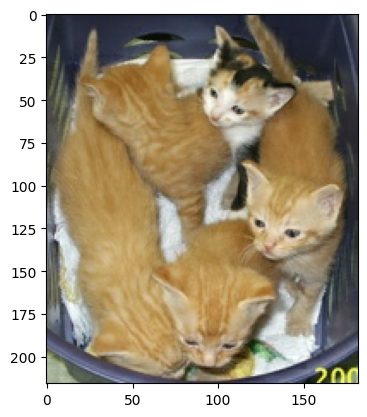

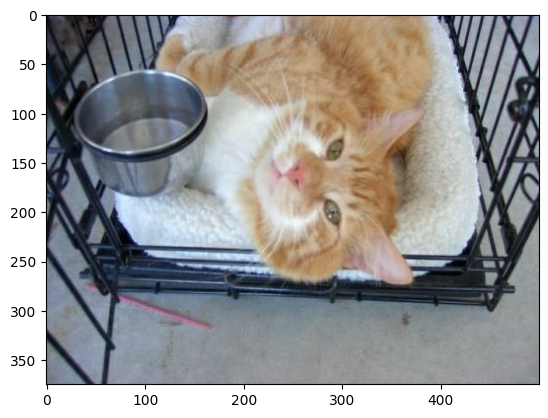

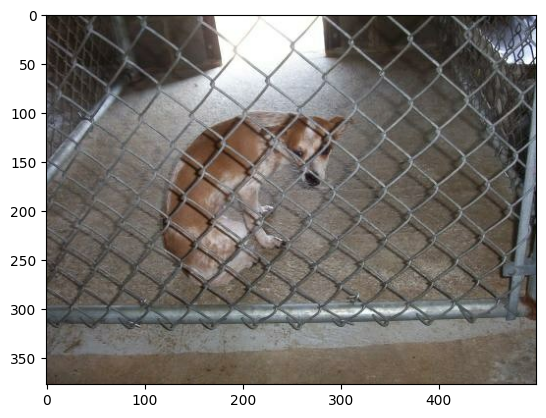

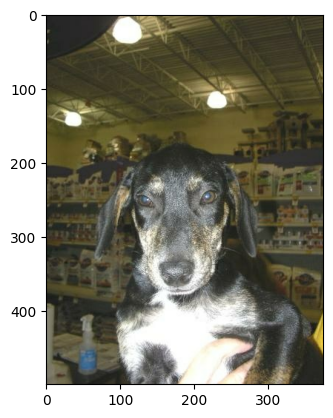

2024-11-21 13:33:48.213829: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# Retrieve 10 images from the dataset
for image, label in tfds.as_numpy(dataset['train'].take(10)):
	plt.imshow(image)
	plt.show()
 
# randomly shuffle the dataset
dataset['train'] = dataset['train'].shuffle(1000)

# split the dataset into training and validation sets
train_size = int(0.7 * info.splits['train'].num_examples)
val_size = int(0.3 * info.splits['train'].num_examples)






---

## Step 5: Build a Multilayer Neural Network
Now, let's build a multilayer neural network for binary classification.


In [ ]:
# build a multilayer neural network for binary classification.

model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 10. Compile the model with adam optimizer, binary_crossentropy loss, and accuracy metric

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


: 

---

## Step 6: Train the Model
Train the model using the Dataset you created


In [ ]:
# Function to resize images
def resize_image(image, label):
	image = tf.image.resize(image, (128, 128))
	return image, label

# Apply the resize function to the dataset
train = dataset['train'].take(train_size).map(resize_image).batch(32)
val = dataset['train'].skip(train_size).take(val_size).map(resize_image).batch(32)

# Train the model with the training set and validate it using the validation set
model.fit(train, epochs=10, validation_data=val)


Epoch 1/10


509/509 ━━━━━━━━━━━━━━━━━━━━ 235s 456ms/step - accuracy: 0.5183 - loss: 21.6625 - val_accuracy: 0.5444 - val_loss: 0.6920
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 228s 445ms/step - accuracy: 0.5326 - loss: 0.6898 - val_accuracy: 0.5502 - val_loss: 0.6841
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 235s 459ms/step - accuracy: 0.5501 - loss: 0.6777 - val_accuracy: 0.5672 - val_loss: 0.6822
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 228s 446ms/step - accuracy: 0.5704 - loss: 0.6686 - val_accuracy: 0.5688 - val_loss: 0.6873
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 262s 445ms/step - accuracy: 0.5959 - loss: 0.6469 - val_accuracy: 0.5765 - val_loss: 0.6835
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 263s 448ms/step - accuracy: 0.6331 - loss: 0.6176 - val_accuracy: 0.5921 - val_loss: 0.6930
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 230s 449ms/step - accuracy: 0.6759 - loss: 0.5751 - val_accuracy: 0.6099 - val_loss: 0.6758
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 229s 447ms/step - accuracy: 0.7382 - loss: 0.5

---

## Step 7: Evaluate the Model
After training, you may upload some test images to evaluate your model.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

def load_and_predict(model):
    uploaded_files = files.upload()

    for fn in uploaded_files.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(150, 150))
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255.0
        
        classes = model.predict(x)
        result = "a dog" if classes[0] > 0.5 else "a cat"
        
        print(f'The model predicts that the image is of {result}')

# Call the function to upload images and get predictions
load_and_predict(model)